# Carga de datos

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob

In [49]:
train = pd.read_csv('./Data/train_con_labels.csv')
test = pd.read_csv('./Data/test_con_labels.csv')

In [50]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [51]:
train

,Unnamed: 0,Unnamed: 0.1,conversation_id,message_line,author,time,text,Label
0,0,0,affc2df0951b733d14ba92d19d9b7695,1,0a39f78bcb297ab0ebe8a29c28bfed89,15:24,bugmail: [Bug 6978] New: Mark eof-terminated script elements as malformed &lt;http://lists.w3.org/Archives/Public/public-html-bugzilla/2009May/0049.html&gt;,0
1,1,0,affc2df0951b733d14ba92d19d9b7695,2,60659cfda992013e610f285c46692d28,15:32,"Henri, can I ask you a Firefox build question (Windows)?",0
2,2,0,affc2df0951b733d14ba92d19d9b7695,3,b8810fee2f4a71f849f3f7409546d1d9,15:34,"60659cfda992013e610f285c46692d28: sure, but I probably don't know the answer",0
3,3,0,affc2df0951b733d14ba92d19d9b7695,4,60659cfda992013e610f285c46692d28,15:35,"It appears the build runs through, it creates a firefox.exe in dist/bin",0
4,4,0,affc2df0951b733d14ba92d19d9b7695,5,60659cfda992013e610f285c46692d28,15:35,"when I start it, I get my standard install of FF (3.0.10) instead...",0
5,5,0,affc2df0951b733d14ba92d19d9b7695,6,60659cfda992013e610f285c46692d28,15:35,"Same if I make a package, unzip it, and start from there...",0
6,6,0,affc2df0951b733d14ba92d19d9b7695,7,b8810fee2f4a71f849f3f7409546d1d9,15:35,60659cfda992013e610f285c46692d28: do you already have the usual Firefox open?,0
7,7,0,affc2df0951b733d14ba92d19d9b7695,8,60659cfda992013e610f285c46692d28,15:35,Likely,0
8,8,0,affc2df0951b733d14ba92d19d9b7695,9,60659cfda992013e610f285c46692d28,15:36,So do I need to close all instances?,0
9,9,0,affc2df0951b733d14ba92d19d9b7695,10,60659cfda992013e610f285c46692d28,15:36,...other...,0


# Procesando el texto

## Corregir ortografía -- Tarda demasiado... Por ahora al menos lo salteamos

Train

def corrector(text):
    try:
        return TextBlob(text).correct()
    except:
        return text

train['text_corregido'] = train['text'].apply(corrector)

train

train.to_csv('train_corregido.csv')

Test

test['text_corregido'] = test['text'].apply(corrector)

test.to_csv('test_corregido.csv')

## Primeras variables "a mano"

Train

In [52]:
train['char_count'] = train['text'].astype('str').apply(len)

In [53]:
train['word_count'] = train['text'].astype('str').apply(lambda x: len(x.split()))

In [54]:
train['word_density'] = train['char_count'] / (train['word_count']+1)

In [55]:
import string
train['punctuation_count'] = train['text'].astype('str').apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 

In [56]:
train['upper_case_word_count'] = train['text'].astype('str').apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [57]:
train['title_word_count'] = train['text'].astype('str').apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))

In [58]:
train['questions'] = train['text'].astype('str').apply(lambda x: len(x) - len(x.rstrip('?')))

In [59]:
train

,Unnamed: 0,Unnamed: 0.1,conversation_id,message_line,author,time,text,Label,char_count,word_count,word_density,punctuation_count,upper_case_word_count,title_word_count,questions
0,0,0,affc2df0951b733d14ba92d19d9b7695,1,0a39f78bcb297ab0ebe8a29c28bfed89,15:24,bugmail: [Bug 6978] New: Mark eof-terminated script elements as malformed &lt;http://lists.w3.org/Archives/Public/public-html-bugzilla/2009May/0049.html&gt;,0,156,11,13.000000,22,0,3,0
1,1,0,affc2df0951b733d14ba92d19d9b7695,2,60659cfda992013e610f285c46692d28,15:32,"Henri, can I ask you a Firefox build question (Windows)?",0,56,10,5.090909,4,1,4,1
2,2,0,affc2df0951b733d14ba92d19d9b7695,3,b8810fee2f4a71f849f3f7409546d1d9,15:34,"60659cfda992013e610f285c46692d28: sure, but I probably don't know the answer",0,76,9,7.600000,3,1,1,0
3,3,0,affc2df0951b733d14ba92d19d9b7695,4,60659cfda992013e610f285c46692d28,15:35,"It appears the build runs through, it creates a firefox.exe in dist/bin",0,71,12,5.461538,3,0,1,0
4,4,0,affc2df0951b733d14ba92d19d9b7695,5,60659cfda992013e610f285c46692d28,15:35,"when I start it, I get my standard install of FF (3.0.10) instead...",0,68,13,4.857143,8,3,2,0
5,5,0,affc2df0951b733d14ba92d19d9b7695,6,60659cfda992013e610f285c46692d28,15:35,"Same if I make a package, unzip it, and start from there...",0,59,12,4.538462,5,1,2,0
6,6,0,affc2df0951b733d14ba92d19d9b7695,7,b8810fee2f4a71f849f3f7409546d1d9,15:35,60659cfda992013e610f285c46692d28: do you already have the usual Firefox open?,0,77,9,7.700000,2,0,1,1
7,7,0,affc2df0951b733d14ba92d19d9b7695,8,60659cfda992013e610f285c46692d28,15:35,Likely,0,6,1,3.000000,0,0,1,0
8,8,0,affc2df0951b733d14ba92d19d9b7695,9,60659cfda992013e610f285c46692d28,15:36,So do I need to close all instances?,0,36,8,4.000000,1,1,2,1
9,9,0,affc2df0951b733d14ba92d19d9b7695,10,60659cfda992013e610f285c46692d28,15:36,...other...,0,11,1,5.500000,6,0,0,0


In [60]:
train.to_csv('train_comportamiento.csv')

Test

In [61]:
test['char_count'] = test['text'].astype('str').apply(len)

In [62]:
test['word_count'] = test['text'].astype('str').apply(lambda x: len(x.split()))

In [63]:
test['word_density'] = test['char_count'] / (test['word_count']+1)

In [64]:
test['punctuation_count'] = test['text'].astype('str').apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 

In [65]:
test['upper_case_word_count'] = test['text'].astype('str').apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [66]:
test['title_word_count'] = test['text'].astype('str').apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))

In [67]:
test['questions'] = test['text'].astype('str').apply(lambda x: len(x) - len(x.rstrip('?')))

In [68]:
test

,Unnamed: 0,Unnamed: 0.1,conversation_id,message_line,author,time,text,Label,char_count,word_count,word_density,punctuation_count,upper_case_word_count,title_word_count,questions
0,0,0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.,0,5,1,2.500000,1,0,1,0
1,1,0,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.,0,3,1,1.500000,1,0,0,0
2,2,0,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?,0,9,2,3.000000,1,0,0,1
3,3,0,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.,0,10,3,2.500000,1,0,0,0
4,4,0,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?,0,4,1,2.000000,1,0,0,1
5,5,0,e621da5de598c9321a1d505ea95e6a2d,6,0158d0d6781fc4d493f243d4caa49747,03:20,same. being lazy. M or f?,0,27,6,3.857143,3,1,1,1
6,6,0,e621da5de598c9321a1d505ea95e6a2d,7,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,F.,0,2,1,1.000000,1,1,1,0
7,7,0,e621da5de598c9321a1d505ea95e6a2d,8,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:21,"Ditto, I&apos;ve done absolutely nothing with my day besides watching stuff on Hulu.",0,84,13,6.000000,4,0,2,0
8,8,0,e621da5de598c9321a1d505ea95e6a2d,9,0158d0d6781fc4d493f243d4caa49747,03:21,M here. Just got home from weekend trip. Tired.,0,49,9,4.900000,3,1,3,0
9,9,0,e621da5de598c9321a1d505ea95e6a2d,10,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:21,"Oh, cool. Family thing?",0,23,4,4.600000,3,0,2,1


In [69]:
test.to_csv('test_comportamiento.csv')

Veamos si hay correlación entre algunas de las nuevas y la Label...

In [70]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'conversation_id', 'message_line',
       'author', 'time', 'text', 'Label', 'char_count', 'word_count',
       'word_density', 'punctuation_count', 'upper_case_word_count',
       'title_word_count', 'questions'],
      dtype='object')

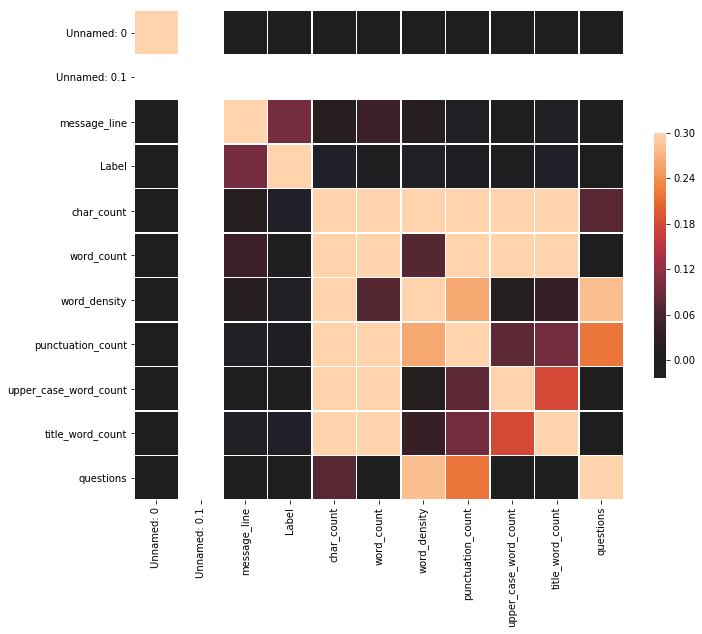

In [71]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nada...

## Más variables con Textblob

In [72]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

In [73]:
# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

Train

In [74]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
import time

In [76]:
start_time = time.time()
train['noun_count'] = train['text'].astype('str').apply(lambda x: check_pos_tag(x, 'noun'))
elapsed_time = time.time() - start_time

In [77]:
elapsed_time

1682.366940498352

In [78]:
train['verb_count'] = train['text'].apply(lambda x: check_pos_tag(x, 'verb'))

In [79]:
train['adj_count'] = train['text'].apply(lambda x: check_pos_tag(x, 'adj'))

In [80]:
train.to_csv('train_comportamiento.csv')

In [81]:
train['adv_count'] = train['text'].apply(lambda x: check_pos_tag(x, 'adv'))

In [82]:
train['pron_count'] = train['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [83]:
train.to_csv('train_comportamiento.csv')

Test

In [84]:
start_time = time.time()
test['noun_count'] = test['text'].apply(lambda x: check_pos_tag(x, 'noun'))
elapsed_time = time.time() - start_time

In [85]:
test['verb_count'] = test['text'].apply(lambda x: check_pos_tag(x, 'verb'))

In [86]:
test['adj_count'] = test['text'].apply(lambda x: check_pos_tag(x, 'adj'))

In [87]:
test.to_csv('test_comportamiento.csv')

In [88]:
test['adv_count'] = test['text'].apply(lambda x: check_pos_tag(x, 'adv'))

In [89]:
test['pron_count'] = test['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [90]:
test.to_csv('test_comportamiento.csv')

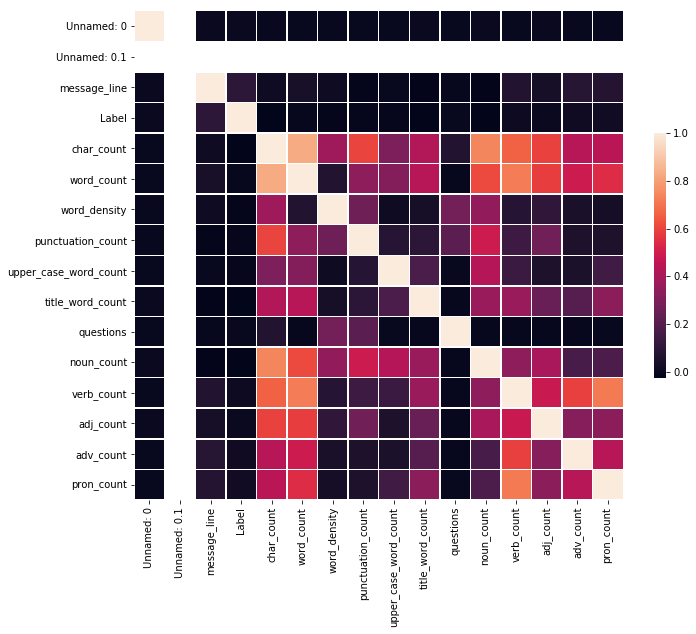

In [91]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5})